Shape: (5201, 24)

First 5 rows:
    Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0              10               627.500000   
1                     0.0              19               154.216667   
2                     0.0               3               738.000000   
3                     0.0               3               395.000000   
4                     0.0              16               407.750000   

   BounceRates  ExitRates  PageValues  SpecialDay  ... TrafficType  \
0     0.020000   0.050000         0.0         0.0  ...           4   
1     0.015789   0.024561         0.0 

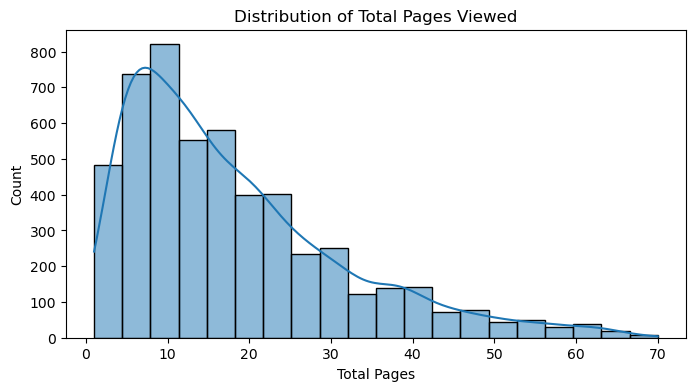

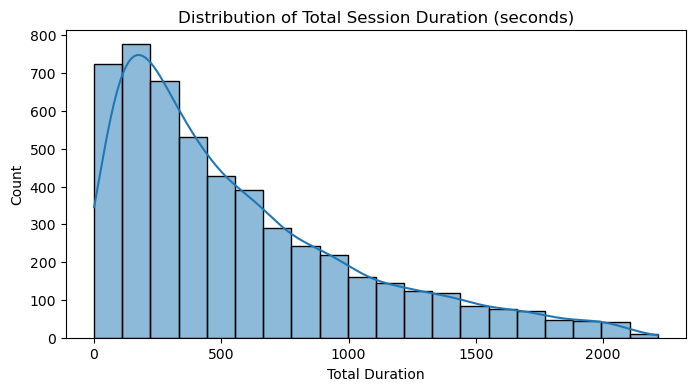

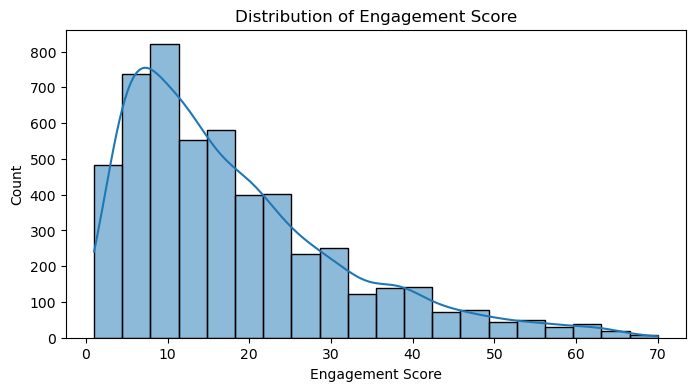

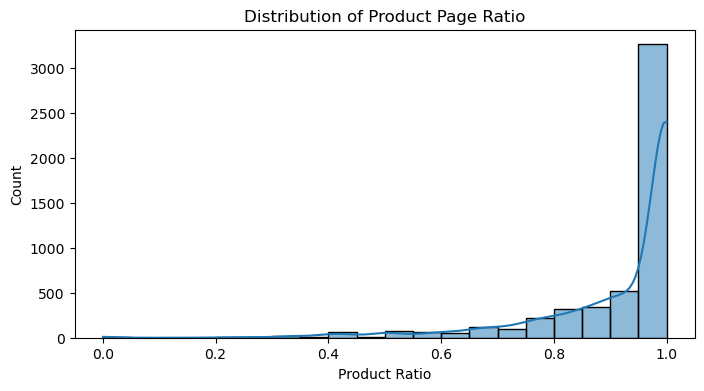

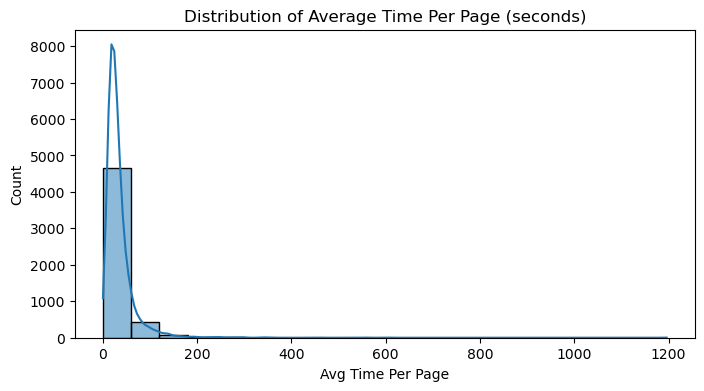

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('online_shoppers_enriched_V4.csv')

# ---- OVERVIEW ----
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:\n", df.head())
print("\nConversion rate (buyers): {:.2f}%".format(df['Revenue'].mean() * 100))

print("\nDescribe (numeric):\n", df.describe())

# Categorical variables
print("\nVisitorType counts:\n", df['VisitorType'].value_counts())
print("\nMonth counts:\n", df['Month'].value_counts())
print("\nWeekend counts:\n", df['Weekend'].value_counts())

# ---- FEATURE DISTRIBUTIONS ----

plt.figure(figsize=(8,4))
sns.histplot(df['Total_Pages'], bins=20, kde=True)
plt.title("Distribution of Total Pages Viewed")
plt.xlabel("Total Pages")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Total_Duration'], bins=20, kde=True)
plt.title("Distribution of Total Session Duration (seconds)")
plt.xlabel("Total Duration")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Engagement_Score'], bins=20, kde=True)
plt.title("Distribution of Engagement Score")
plt.xlabel("Engagement Score")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Product_Ratio'], bins=20, kde=True)
plt.title("Distribution of Product Page Ratio")
plt.xlabel("Product Ratio")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Avg_Time_Per_Page'], bins=20, kde=True)
plt.title("Distribution of Average Time Per Page (seconds)")
plt.xlabel("Avg Time Per Page")
plt.show()




Mean values by purchase status:

         Total_Pages  Total_Duration  Engagement_Score  Product_Ratio  \
Revenue                                                                 
False      18.123535      564.335412         18.123535       0.921759   
True       18.138554      564.465096         18.138554       0.788273   

         Avg_Time_Per_Page  
Revenue                     
False            34.637181  
True             31.008385  


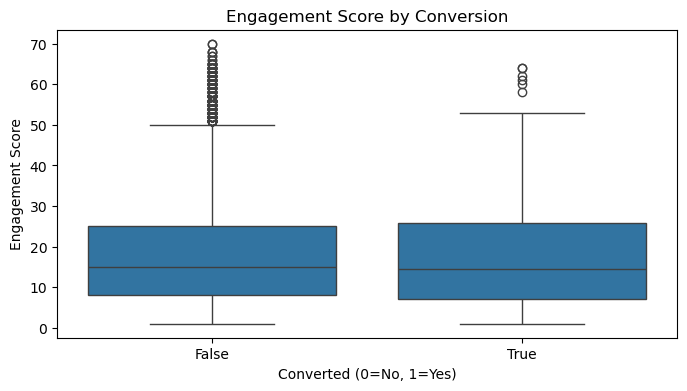

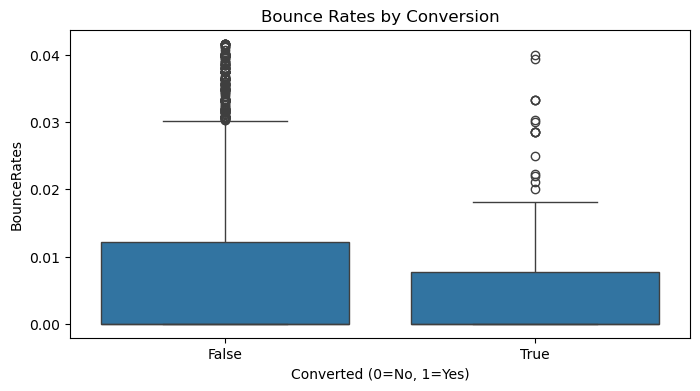

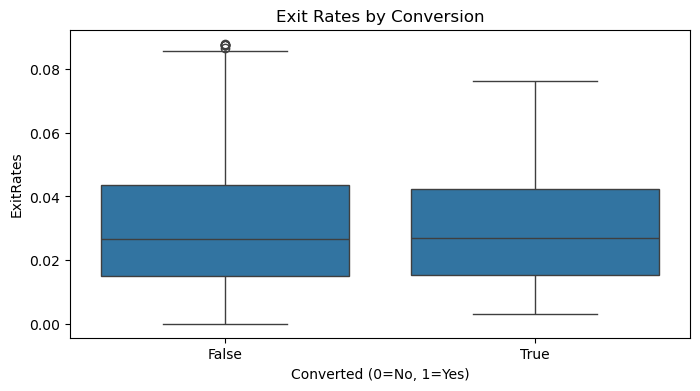

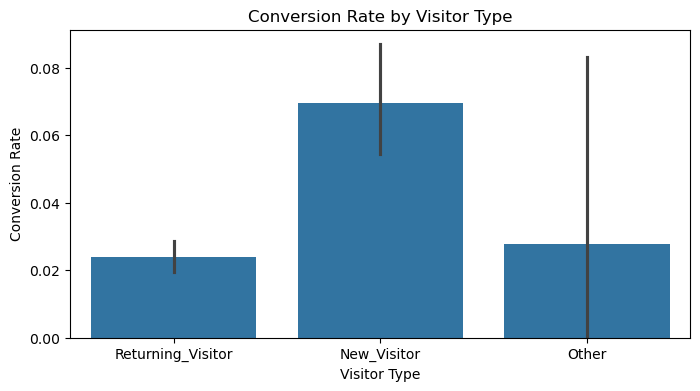

C:\Users\Excalibur\AppData\Local\Temp\ipykernel_43352\4285893565.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=weekend_conv.values, palette='mako')


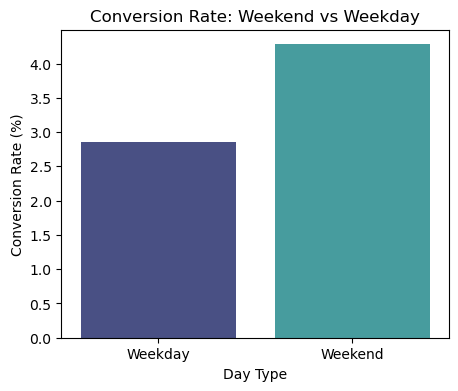

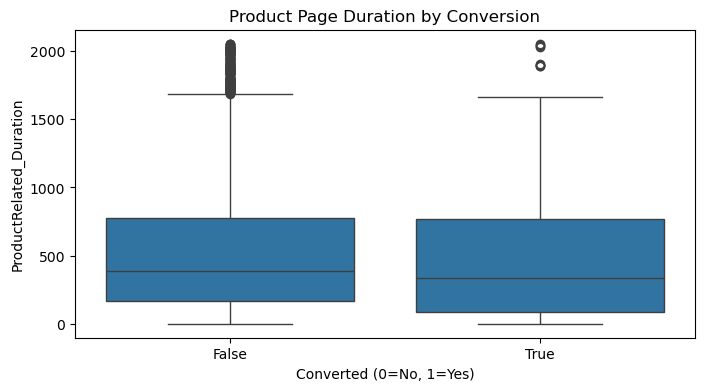

C:\Users\Excalibur\AppData\Local\Temp\ipykernel_43352\4285893565.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_conv.index, y=month_conv.values, palette='coolwarm')


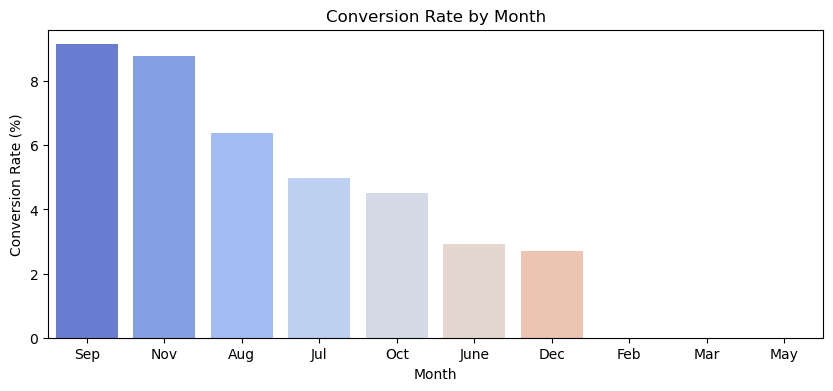

In [7]:
# ---- RQ1: Behavioral metrics vs. conversion ----
import matplotlib.pyplot as plt
import seaborn as sns
print("\nMean values by purchase status:\n")
print(df.groupby('Revenue')[['Total_Pages','Total_Duration','Engagement_Score','Product_Ratio','Avg_Time_Per_Page']].mean())

plt.figure(figsize=(8,4))
sns.boxplot(x='Revenue', y='Engagement_Score', data=df)
plt.title('Engagement Score by Conversion')
plt.xlabel('Converted (0=No, 1=Yes)')
plt.ylabel('Engagement Score')
plt.show()

# ---- RQ2: Bounce & exit rates ----
plt.figure(figsize=(8,4))
sns.boxplot(x='Revenue', y='BounceRates', data=df)
plt.title('Bounce Rates by Conversion')
plt.xlabel('Converted (0=No, 1=Yes)')
plt.ylabel('BounceRates')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Revenue', y='ExitRates', data=df)
plt.title('Exit Rates by Conversion')
plt.xlabel('Converted (0=No, 1=Yes)')
plt.ylabel('ExitRates')
plt.show()

# ---- RQ3: Segments ----
plt.figure(figsize=(8,4))
sns.barplot(x='VisitorType', y='Revenue', data=df)
plt.title('Conversion Rate by Visitor Type')
plt.ylabel('Conversion Rate')
plt.xlabel('Visitor Type')
plt.show()

plt.figure(figsize=(5,4))
weekend_conv = df.groupby('Weekend')['Revenue'].mean() * 100
labels = ['Weekday', 'Weekend']
sns.barplot(x=labels, y=weekend_conv.values, palette='mako')
plt.title('Conversion Rate: Weekend vs Weekday')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Day Type')
plt.show()

# ---- RQ4: Time spent on product/informational pages ----
plt.figure(figsize=(8,4))
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title('Product Page Duration by Conversion')
plt.xlabel('Converted (0=No, 1=Yes)')
plt.ylabel('ProductRelated_Duration')
plt.show()

# ---- RQ5: Seasonality ----
plt.figure(figsize=(10,4))
month_conv = df.groupby('Month')['Revenue'].mean().sort_values(ascending=False) * 100
sns.barplot(x=month_conv.index, y=month_conv.values, palette='coolwarm')
plt.title('Conversion Rate by Month')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Month')
plt.show()
